## _Supervised Learning:   Random Forest Classifier, Linear Classifier_

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import warnings
from pandas.errors import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [2]:
# Read data

root_path = ''

In [3]:
df = pd.read_csv(root_path + 'credit_approval.csv')

In [4]:
df.head()

,Unnamed: 0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  690 non-null    int64  
 1   1           690 non-null    int64  
 2   2           690 non-null    float64
 3   3           690 non-null    float64
 4   4           690 non-null    int64  
 5   5           690 non-null    int64  
 6   6           690 non-null    int64  
 7   7           690 non-null    float64
 8   8           690 non-null    int64  
 9   9           690 non-null    int64  
 10  10          690 non-null    int64  
 11  11          690 non-null    int64  
 12  12          690 non-null    int64  
 13  13          690 non-null    int64  
 14  14          690 non-null    int64  
 15  15          690 non-null    int64  
dtypes: float64(3), int64(13)
memory usage: 86.4 KB


In [6]:
df.columns

Index(['Unnamed: 0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
       '12', '13', '14', '15'],
      dtype='object')

### Exploring Data

In [7]:
import matplotlib.pyplot as plt

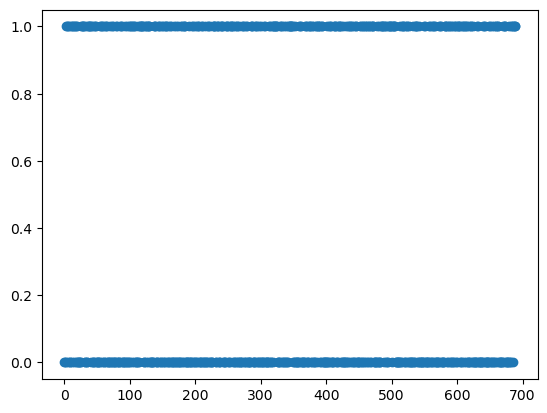

In [8]:
# Categorical attributes

plt.scatter(range(len(df)), df['15'])

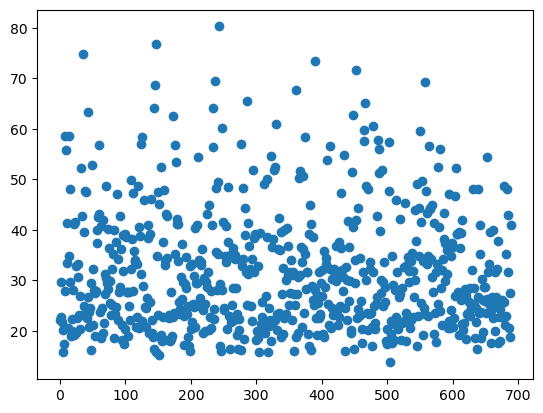

In [9]:
# Numerical attributes

plt.scatter(range(len(df)), df['2'])

### Preprocessing

### Task 0

a) Rename the first 14th (relevant) columns as `col1`, `col2` ... `col14` and the last column as `target`. Your function should return both the data corresponding to the _X values_ and the _Y values_.

_Hint:_ You can use the `drop` function explained [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) to eliminate the first column.

In [10]:
def clean_df(df):
    df = df.copy()
    
    df = df.drop(df.columns[0], axis=1)
    
    feature_cols = [f"col{i}" for i in range(1, 15)]  
    target_col = "target"
    df.columns = feature_cols + [target_col]
    
    dataX = df[feature_cols]
    dataY = df[[target_col]]   

    return dataX, dataY


In [11]:
dataX, dataY = clean_df(df)

In [12]:
# Verify result
dataX.head()


,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1
3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1
4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159


In [13]:
dataY.head()

,target
0,0
1,0
2,0
3,1
4,1


b) Which columns could be classified as categorical? Plot one column of your choice containing numerical values. Justify your choice (please use the `markdown` option provided in your notebook).

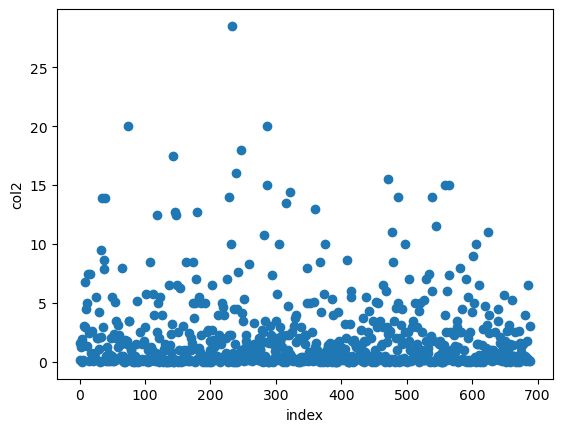

In [14]:
import matplotlib.pyplot as plt

dataX.nunique()

plt.scatter(range(len(dataX)), dataX['col7'])
plt.xlabel('index')
plt.ylabel('col2')
plt.show()


Columns that can be classified as categorical are those that only take a small number of distinct values. These values act as codes for groups, not as quantities on a continuous scale.

Using `dataX.nunique()` we see that columns such as `col1`, `col4`, `col5`, `col6`, `col8`, `col9`, `col10`, `col11` and `col12` have only a few different values (for example 0/1 or 1/2/3). Because the values are just codes that label categories, these columns are categorical.

On the other hand, columns such as `col2`, `col3`, `col7`, `col13` and `col14` have many distinct values and span a wide range. For these columns it makes sense to talk about distances, averages and scaling, so they are numerical.

In the plot I chose `col2` as an example of a numerical column. The scatter plot shows that it varies smoothly over many different values rather than jumping between a few fixed codes, which is typical of a numerical attribute.

In [15]:
dataX, dataY = clean_df(df)

In [16]:
# Verify result
dataY.head()

,target
0,0
1,0
2,0
3,1
4,1


c) Does the data stored in the `target` data frame have numerical attributes? Besides the graphical representation, how can the values of a column be classified as numerical or categorical?

In [17]:
dataY['target'].value_counts(), dataY['target'].dtype


(target
 0    383
 1    307
 Name: count, dtype: int64,
 dtype('int64'))

The values stored in the `target` DataFrame are 0 and 1, and they are represented as integers. However, they do not represent an amount on a numeric scale. Instead, each value corresponds to a class (for example, 0 = "rejected", 1 = "approved"). Operations such as taking the average of the labels do not have a meaningful interpretation.

For this reason, even though the data type is integer, the `target` column should be treated as a categorical variable with two categories. In general, a column is considered numerical when arithmetic operations (differences, averages, scaling) are meaningful, and categorical when its values are just labels that distinguish groups or classes.


### Normalization

### Task 1

The following formula computes a _Z score_ and measures how far a single raw data value is from the population mean.

\begin{equation*}
z = \frac{X - \mu }{\sigma }
\end{equation*}

where:
* _X_ is a single raw data value
* `mu` is the population mean
* `sigma` is the population standard deviation

The `compute_stats` function receives a `DataFrame object` for which builds a `stats DataFrame` where the mean and standard deviation are computed for each column of the input.

The final result should have 3 columns:
* the name of the column for which the mean and the standard deviation were computed,
* the mean column computed for the values in the corresponding column,
* the standard deviation computed for the values in the corresponding column.

_Hints:_ 
1. You might want to use `df.loc` property [which can be found here.](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html)

2. Verify your data by using `notnull()` [function.](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.notnull.html)

You may use:
`df.loc[df[column_name].notnull(), column_name]` to access all the elements of a column that are not null.

In [18]:
def compute_stats(df):
    stats = pd.DataFrame({'col_names': df.columns})
    stats['avg'] = 0.0
    stats['std'] = 0.0
    for col in df.columns:
        vals = df.loc[df[col].notnull(), col]
        stats.loc[stats['col_names'] == col, 'avg'] = vals.mean()
        stats.loc[stats['col_names'] == col, 'std'] = vals.std()
    return stats


In [19]:
stats_dataX = compute_stats(dataX)


In [20]:
# Expected Output:
stats_dataX

,col_names,avg,std
0,col1,0.678261,0.467482
1,col2,31.568203,11.853273
2,col3,4.758725,4.978163
3,col4,1.766667,0.430063
4,col5,7.372464,3.683265
5,col6,4.692754,1.992316
6,col7,2.223406,3.346513
7,col8,0.523188,0.499824
8,col9,0.427536,0.495080
9,col10,2.400000,4.862940


To finish this task, use the `stats DataFrame` computed before and compute the _Z score_ formula.

In [21]:
def normalize(df, s):
    df = df.copy()
    for col in df.columns:
        mask = df[col].notnull()
        mu = float(s.loc[s['col_names'] == col, 'avg'])
        sigma = float(s.loc[s['col_names'] == col, 'std'])
        df.loc[mask, col] = (df.loc[mask, col] - mu) / sigma
    return df


In [22]:
norm_dataX = normalize(dataX, stats_dataX)

C:\Users\Mario Sakka\AppData\Local\Temp\ipykernel_25736\1731659806.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  mu = float(s.loc[s['col_names'] == col, 'avg'])
C:\Users\Mario Sakka\AppData\Local\Temp\ipykernel_25736\1731659806.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  sigma = float(s.loc[s['col_names'] == col, 'std'])
C:\Users\Mario Sakka\AppData\Local\Temp\ipykernel_25736\1731659806.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 0.68823797 -1.45088004 -1.45088004 -1.45088004  0.68823797 -1.45088004
  0.68823797 -1.45088004  0.68823797 -1.45088004  0.68823797  0.68823797
  0.68823797  0.68823797  0.68823797  0.68823797  0.68823797 -1.45088004
  0.68823797 -1.45088004 -1.45088004 -1.4508

In [23]:
# Expected Output:
norm_dataX.head()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14
0,0.688238,-0.800471,1.346134,0.542556,-0.915618,-0.347713,-0.190767,-1.046745,-0.863570,-0.493529,1.087120,0.237655,-0.488004,0.037353
1,-1.450880,-0.750696,0.450221,0.542556,0.170375,-0.347713,-0.615090,-1.046745,-0.863570,-0.493529,-0.918529,0.237655,-0.139490,-0.195272
2,-1.450880,-0.167735,-0.604384,-1.782685,-0.915618,-0.347713,-0.290872,-1.046745,-0.863570,-0.493529,1.087120,0.237655,0.557539,-0.195272
3,-1.450880,-0.835061,1.354169,-1.782685,-0.644120,-0.849641,-0.664395,0.953958,1.156306,1.768477,1.087120,0.237655,-1.068862,-0.195272
4,0.688238,-0.961608,0.685248,0.542556,-0.372622,-0.347713,-0.078711,0.953958,1.156306,2.385388,-0.918529,0.237655,-0.720347,-0.164946


### Task 2
 
Fill in the missing elements in:
 
a) the `get_score` function below:

In [24]:
from sklearn.metrics import roc_auc_score

In [25]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train.values.ravel())
    y_train_scores = model.predict_proba(X_train)[:, 1]
    y_test_scores = model.predict_proba(X_test)[:, 1]
    train_roc_scores = roc_auc_score(y_train, y_train_scores)
    test_roc_scores = roc_auc_score(y_test, y_test_scores)
    return train_roc_scores, test_roc_scores


In [26]:
# Perform k-fold manually
 
dataX_i = list(dataX.index.values)
 
import random
 
random.shuffle(dataX_i)

b) Store the rearranged indices in 5 different lists, congregated in the list of lists `xi`.

In [27]:
k = 5
fold_size = int(len(dataX_i) / k)
xi = []
for i in range(k):
    start = i * fold_size
    end = (i + 1) * fold_size
    xi.append(dataX_i[start:end])


In [28]:
print(xi)

[[458, 337, 653, 488, 498, 286, 531, 472, 475, 471, 240, 635, 340, 578, 100, 398, 585, 605, 368, 541, 522, 358, 342, 68, 131, 167, 303, 456, 395, 10, 612, 640, 375, 334, 143, 451, 514, 587, 592, 492, 99, 452, 619, 630, 360, 323, 622, 414, 33, 580, 377, 330, 608, 527, 49, 484, 22, 264, 627, 269, 78, 670, 177, 282, 636, 469, 574, 461, 624, 506, 189, 371, 615, 171, 595, 24, 118, 515, 491, 341, 169, 251, 509, 145, 11, 67, 673, 37, 216, 222, 130, 79, 468, 572, 299, 343, 20, 293, 122, 91, 127, 325, 109, 583, 642, 388, 209, 154, 170, 41, 537, 124, 511, 593, 332, 242, 499, 161, 686, 600, 333, 73, 344, 415, 292, 350, 393, 133, 160, 392, 524, 181, 568, 259, 449, 345, 9, 365], [226, 486, 543, 16, 70, 641, 654, 501, 547, 437, 666, 151, 34, 172, 652, 402, 556, 482, 64, 644, 150, 386, 657, 520, 581, 539, 613, 39, 356, 322, 82, 218, 361, 439, 21, 424, 229, 197, 510, 405, 674, 639, 58, 55, 149, 632, 394, 283, 480, 650, 224, 562, 23, 72, 500, 426, 433, 87, 553, 36, 182, 335, 648, 378, 421, 505, 399, 11

### Cross Validation

Cross-Validation is a statistical method of evaluating and comparing learning algorithms by dividing data into two segments: one used to learn or train a model and the other used to validate the model. In typical cross-validation, the training and validation sets must cross-over in successive rounds such that each data point has a chance of being validated against. [Source](https://doi.org/10.1007/978-0-387-39940-9_565)

One example of _Cross Validation_ techniques that can be useful is represented by k-fold cross validation. In our exercise, let us set the value of `k=5` such that we test different portions of our dataset and verify the performance of the model.

In [29]:
train_scores_lr = []
test_scores_lr = []
i=0
while i < 5:
    test_xi = np.asarray(xi[i]) 
    train_xi = np.concatenate(xi[:i] + xi[i+1:])
    
    X_train, X_test = dataX.iloc[train_xi, :], dataX.iloc[test_xi, :]
    y_train, y_test = dataY.iloc[train_xi], dataY.iloc[test_xi]
    
    # Compute stats and normalize data
    stats = compute_stats(X_train)
    
    X_train = normalize(X_train, stats)
    X_test = normalize(X_test, stats)
    
    # Perform Logistic Regression
    logReg = LogisticRegression(solver='liblinear')
    
    # Evaluate model
    train_slr, test_slr = get_score(logReg, X_train, X_test, y_train, y_test)
    
    # Store the obtained results for further comparisons
    train_scores_lr.append(train_slr)
    test_scores_lr.append(test_slr)
    
    i += 1

C:\Users\Mario Sakka\AppData\Local\Temp\ipykernel_25736\1731659806.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  mu = float(s.loc[s['col_names'] == col, 'avg'])
C:\Users\Mario Sakka\AppData\Local\Temp\ipykernel_25736\1731659806.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  sigma = float(s.loc[s['col_names'] == col, 'std'])
C:\Users\Mario Sakka\AppData\Local\Temp\ipykernel_25736\1731659806.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 0.66933237  0.66933237  0.66933237  0.66933237  0.66933237 -1.49131949
  0.66933237  0.66933237  0.66933237  0.66933237  0.66933237  0.66933237
  0.66933237  0.66933237  0.66933237  0.66933237 -1.49131949  0.66933237
 -1.49131949  0.66933237  0.66933237 -1.4913

In [30]:
print('Logistic Regression scores TRAIN: ', train_scores_lr)
print('Logistic Regression scores TEST: ', test_scores_lr)

Logistic Regression scores TRAIN:  [0.9410389957264959, 0.9425697253566107, 0.9382162563667233, 0.9461255106824727, 0.9404904660877357]
Logistic Regression scores TEST:  [0.935673743956275, 0.9354497354497354, 0.951941643424158, 0.9142857142857143, 0.9446759259259259]


In [31]:
dataScores = pd.DataFrame()
dataScores['LR scores train'] = train_scores_lr
dataScores['LR scores test'] = test_scores_lr
dataScores.to_csv(root_path + 'scores.csv')

### Task 3

a) Implement for this problem a Random Forest Classifier using the [sklearn library module](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) and optimise its parameters. Justify your conclusions. Add new columns to `dataScores DataFrame` for the obtained results.

b) Implement for this problem a Linear Classifier using the [sklearn library module](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html) and optimise its parameters. Justify your conclusions. Add new columns to `dataScores DataFrame` for the obtained results.

c) Which algorithm performed best? Why?

In [32]:
from sklearn.ensemble import RandomForestClassifier

train_scores_rf = []
test_scores_rf = []

i = 0
while i < 5:
    test_xi = np.asarray(xi[i])
    train_xi = np.concatenate(xi[:i] + xi[i+1:])

    X_train, X_test = dataX.iloc[train_xi, :], dataX.iloc[test_xi, :]
    y_train, y_test = dataY.iloc[train_xi], dataY.iloc[test_xi]

    stats = compute_stats(X_train)
    X_train = normalize(X_train, stats)
    X_test = normalize(X_test, stats)

    rf = RandomForestClassifier(
        n_estimators=50,
        max_depth=6,
        min_samples_leaf=10,
        max_features='sqrt',
        random_state=0
    )


    train_rf, test_rf = get_score(rf, X_train, X_test, y_train, y_test)

    train_scores_rf.append(train_rf)
    test_scores_rf.append(test_rf)

    i += 1


C:\Users\Mario Sakka\AppData\Local\Temp\ipykernel_25736\1731659806.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  mu = float(s.loc[s['col_names'] == col, 'avg'])
C:\Users\Mario Sakka\AppData\Local\Temp\ipykernel_25736\1731659806.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  sigma = float(s.loc[s['col_names'] == col, 'std'])
C:\Users\Mario Sakka\AppData\Local\Temp\ipykernel_25736\1731659806.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 0.66933237  0.66933237  0.66933237  0.66933237  0.66933237 -1.49131949
  0.66933237  0.66933237  0.66933237  0.66933237  0.66933237  0.66933237
  0.66933237  0.66933237  0.66933237  0.66933237 -1.49131949  0.66933237
 -1.49131949  0.66933237  0.66933237 -1.4913

In [33]:
from sklearn.svm import SVC

train_scores_lc = []
test_scores_lc = []

i = 0
while i < 5:
    test_xi = np.asarray(xi[i])
    train_xi = np.concatenate(xi[:i] + xi[i+1:])

    X_train, X_test = dataX.iloc[train_xi, :], dataX.iloc[test_xi, :]
    y_train, y_test = dataY.iloc[train_xi], dataY.iloc[test_xi]

    stats = compute_stats(X_train)
    X_train = normalize(X_train, stats)
    X_test = normalize(X_test, stats)

    svm_clf = SVC(kernel='linear', probability=True, random_state=0)

    train_lc, test_lc = get_score(svm_clf, X_train, X_test, y_train, y_test)

    train_scores_lc.append(train_lc)
    test_scores_lc.append(test_lc)

    i += 1


C:\Users\Mario Sakka\AppData\Local\Temp\ipykernel_25736\1731659806.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  mu = float(s.loc[s['col_names'] == col, 'avg'])
C:\Users\Mario Sakka\AppData\Local\Temp\ipykernel_25736\1731659806.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  sigma = float(s.loc[s['col_names'] == col, 'std'])
C:\Users\Mario Sakka\AppData\Local\Temp\ipykernel_25736\1731659806.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 0.66933237  0.66933237  0.66933237  0.66933237  0.66933237 -1.49131949
  0.66933237  0.66933237  0.66933237  0.66933237  0.66933237  0.66933237
  0.66933237  0.66933237  0.66933237  0.66933237 -1.49131949  0.66933237
 -1.49131949  0.66933237  0.66933237 -1.4913

In [34]:
dataScores = pd.DataFrame()
dataScores['LR scores train'] = train_scores_lr
dataScores['LR scores test'] = test_scores_lr
dataScores['RF scores train'] = train_scores_rf
dataScores['RF scores test'] = test_scores_rf
dataScores['LC scores train'] = train_scores_lc
dataScores['LC scores test'] = test_scores_lc

dataScores.to_csv(root_path + 'scores.csv')
dataScores


,LR scores train,LR scores test,RF scores train,RF scores test,LC scores train,LC scores test
0,0.941039,0.935674,0.965932,0.917175,0.939169,0.937145
1,0.942570,0.935450,0.966588,0.933122,0.929609,0.912804
2,0.938216,0.951942,0.963962,0.957949,0.922392,0.936280
3,0.946126,0.914286,0.965428,0.931933,0.944572,0.917647
4,0.940490,0.944676,0.964737,0.943519,0.938422,0.939352


The table shows the ROC AUC scores I got with 5-fold cross-validation for three models:

- **LR scores train / test**: Logistic Regression  
- **RF scores train / test**: Random Forest  
- **LC scores train / test**: Linear Classifier (linear SVM)

Each row is one fold. In every fold I train on about 80% of the data and test on the remaining 20%. For both train and test I compute the ROC AUC.

My observations:

- **Logistic Regression (LR)**  
  - Train AUC is around **0.94**.  
  - Test AUC is roughly **0.91–0.95**.  
  - The difference between train and test is small, so LR seems to generalise well and does not overfit much.

- **Random Forest (RF)**  
  - Train AUC is around **0.96–0.97**.  
  - Test AUC is also high, about **0.92–0.96**.  
  - After tuning the parameters, the Random Forest still performs very well but no longer has a perfect score on the training set, so it looks less overfitted than before.

- **Linear Classifier (LC)**  
  - Train AUC is around **0.92–0.95**.  
  - Test AUC is around **0.91–0.94**.  
  - Its behaviour is similar to Logistic Regression: good scores and small gaps between train and test.

Overall, all three models get ROC AUC values above **0.9** on the test folds, which means they are all quite good at ranking approved vs rejected credit applications. The Random Forest is slightly better on average, but the simpler linear models are not far behind.
